In [30]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data = Path('./Resources/combined_data_1.csv')
df = pd.read_csv(data)
df.head()

,order_name,family_name,scientific_name,datetime,individuals,location_name,tempmax,tempmin,temp_daily,humidity
0,LEPIDOPTERA,COLEOPHORIDAE,Coleophora adjunctella Hodgk.,7/11/1994,1,"Universitetsparken 15, 2100 KÃƒÂ¸benhavn, Denmark",75.5,55.5,68.3,65.6
1,LEPIDOPTERA,COLEOPHORIDAE,Coleophora adjunctella Hodgk.,7/17/1996,1,"Universitetsparken 15, 2100 KÃƒÂ¸benhavn, Denmark",62.7,47.8,56.5,72.8
2,LEPIDOPTERA,COLEOPHORIDAE,Coleophora adjunctella Hodgk.,7/25/1996,1,"Universitetsparken 15, 2100 KÃƒÂ¸benhavn, Denmark",76.6,57.1,63.8,74.2
3,LEPIDOPTERA,COLEOPHORIDAE,Coleophora adjunctella Hodgk.,6/30/1997,2,"Universitetsparken 15, 2100 KÃƒÂ¸benhavn, Denmark",73.8,61.1,67.0,84.3
4,LEPIDOPTERA,COLEOPHORIDAE,Coleophora adjunctella Hodgk.,6/21/2000,2,"Universitetsparken 15, 2100 KÃƒÂ¸benhavn, Denmark",86.0,64.1,75.6,67.5


In [32]:
y = df["individuals"]
X = df.loc[:,["tempmax"]]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(594, 1)

In [34]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred = classifier.predict(X)
print(y_pred.shape)

(792,)


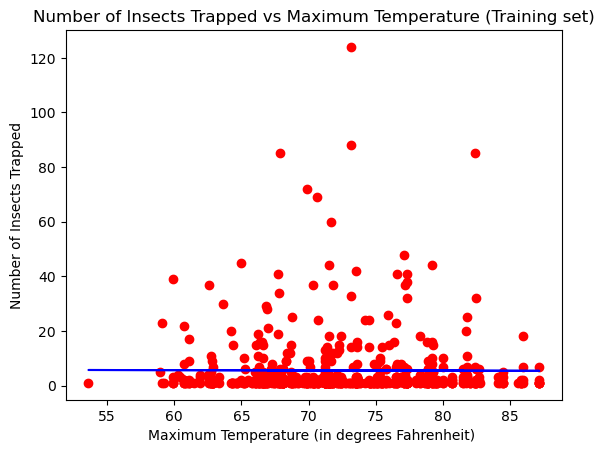

In [8]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Maximum Temperature (Training set)')
plt.xlabel('Maximum Temperature (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [9]:
y = df["individuals"]
X = df.loc[:,["tempmin"]]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(594, 1)

In [11]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

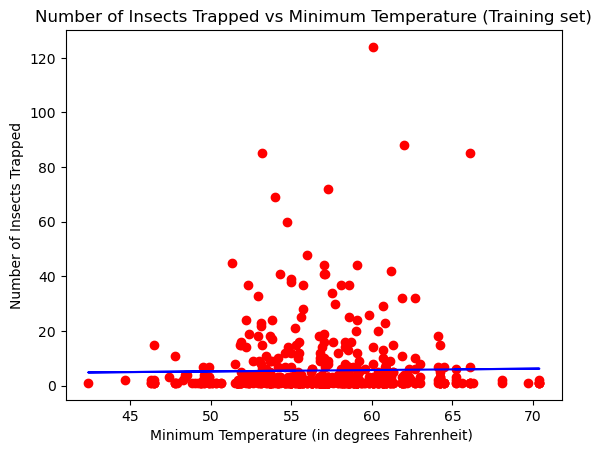

In [12]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Minimum Temperature (Training set)')
plt.xlabel('Minimum Temperature (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [13]:
y = df["individuals"]
X = df.loc[:,["temp_daily"]]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(594, 1)

In [15]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

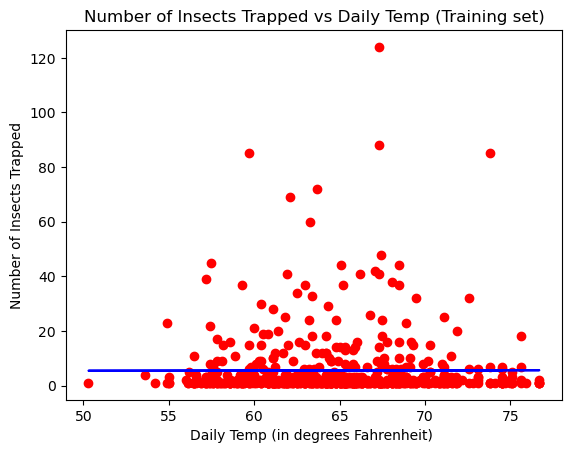

In [16]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Daily Temp (Training set)')
plt.xlabel('Daily Temp (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [17]:
y = df["individuals"]
X = df.loc[:,["humidity"]]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(594, 1)

In [19]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

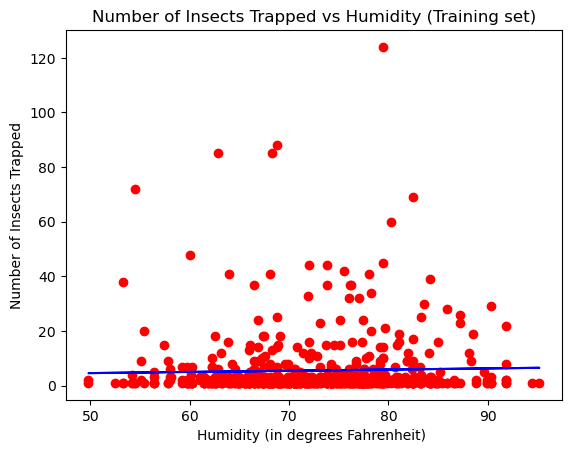

In [20]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Humidity (Training set)')
plt.xlabel('Humidity (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [21]:
# Segment the features from the target
y = df["individuals"]
X = df.drop(columns=["order_name", "family_name", "scientific_name", "datetime", "individuals", "location_name","tempmax","tempmin", "humidity"])

In [22]:
# Use the train_test_split function to create training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
X_train.shape

(633, 1)

In [23]:
# Instantiate a linear SVM model
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [24]:
# Fit the data
model.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
# Make predictions using the test data
y_pred = model.predict(X_test)
results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5157232704402516

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[82,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.52      1.00      0.68        82
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          31       0.00    

c:\Users\Andrea\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrea\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrea\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [29]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report